데이터가 처음 주어졌을 때, 변수들이 어떤 요소로 어느 정도의 비율로 구성되어 있는지 확인하는 단계는

꼭 필요하다.

분포시각화를 통해 보다 직관적으로 데이터를 이해할 수 있다

분포시각화는 연속형과 같은 양적 척도인지, 명목형과 같은 질적 척도인지에 따라 구분해서 그린다

양적척도 : 막대그래프, 선그래프, 히스토그램

히스토그램은 처음에 20개 정도의 구간으로 세세하게 나누어서 분포를 살펴본 다음

시각적으로 봤을때 정보의 손실이 커지기 전까지 조금씩 구간의 개수를 줄여가면 된다

구간이 너무 많으면 보기 어렵고 너무 적으면 정보의 손실이 크기 때문에 시각화의 이점이 사라진다

질적척도 : 단순 : 파이차트, 도넛차트

파이차트나 도넛차트를 그릴때는 시각적 표현만으로는 비율을 정확히 알기 힘들기 때문에 수치를 함께 표시해주는

것이 좋다.

질적척도 : 복잡 : 트리맵차트

한정된 공간 안에서 많은 구성된 요소들의 분포를 체계적으로 표현할 수 있다

1. 필요한 패키지 설치

In [ ]:
!pip install plotly
!pip install pywaffle

2. 필요한 패키지 임포트

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle

3. 데이터 불러오기 및 확인

In [41]:
df = pd.read_csv('/content/six_countries_height_samples.csv')

df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


4. 히스토그램 시각화

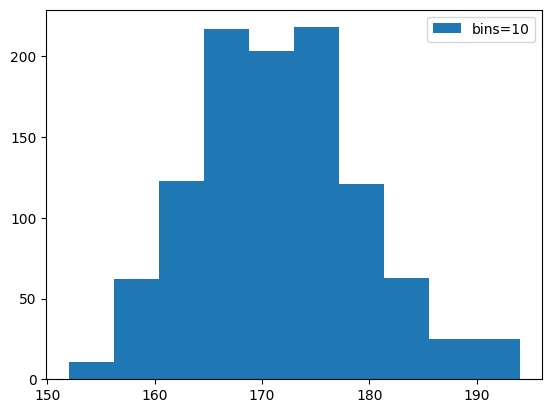

In [42]:
df1 = df['height_cm']

plt.hist(df1, bins = 10, label='bins=10') # bins = 10을 10cm 단위로 주어 분포가 나타나도록 함

plt.legend()

plt.show()

5. 성별을 구분하여 히스토그램 시각화

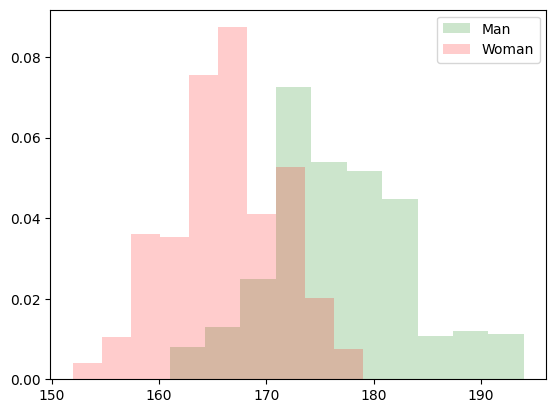

In [43]:
# 남자와 여자 데이터 분리
df1_1 = df[df['sex'].isin(['man'])]
df1_1 = df1_1['height_cm']

df1_2 = df[df['sex'].isin(['woman'])]
df1_2 = df1_2['height_cm']

plt.hist(df1_1, color='green', alpha = 0.2, bins = 10, label='Man', density= True)
plt.hist(df1_2, color='red', alpha = 0.2, bins = 10, label='Woman', density= True)

plt.legend()
plt.show()

파이차트와 도넛차트

1. 파이차트와 도넛차트 생성을 위한 데이터 전처리

In [44]:
df2 = df[['country', 'height_cm']]

df2= df2[df.height_cm >= 175]
df2 = df2.groupby('country').count().reset_index()

df2.head(10)

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


2. 파이차트 시각화

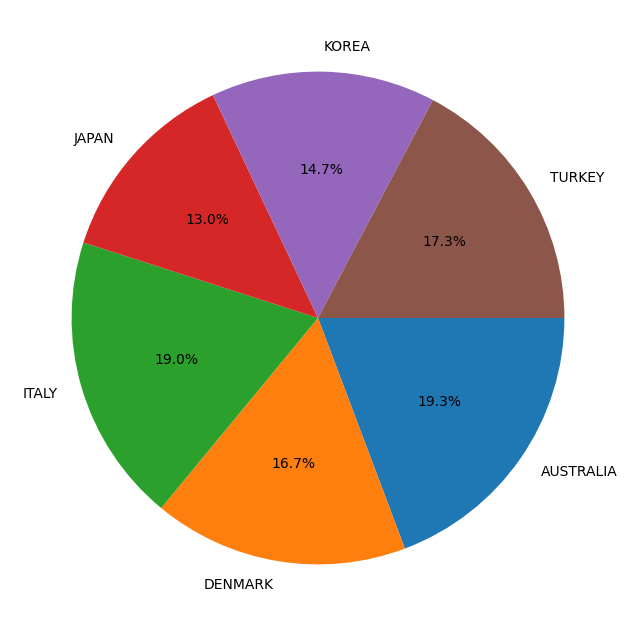

In [45]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')  # 캔버스 배경색 설정
ax = fig.add_subplot()  # 프레임 생성

# 파이차트 출력
ax.pie(df2.height_cm,
       labels = df2.country, # 라벨 출력
       startangle = 0,   # 시작점 degree설정
       counterclock = False,    # 시계 방향
       autopct = lambda p : '{:.1f}%'.format(p)  # 퍼센트 자릿수 설정
       )

plt.show()

3. 도넛차트 시각화

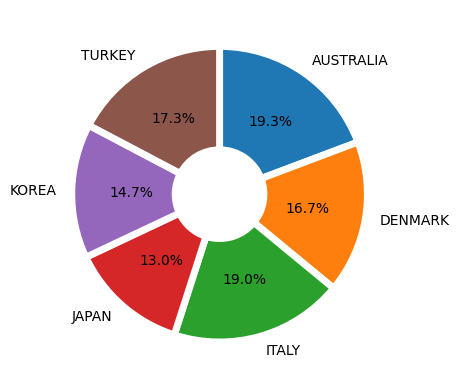

In [46]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df2.height_cm, labels= df2.country, autopct = '%.1f%%',
        startangle=90, counterclock=False, wedgeprops=wedgeprops)

plt.show()

트리맵 차트

1. 트리맵차트 시각화를 위한 데이터 전처리


In [47]:
df3 = df[['country', 'sex', 'height_cm']]
df3 = df3[df.height_cm >= 175]

df3 = df3.groupby(['country', 'sex']).count().reset_index()

df3.head(10)

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


2. 트리맵 시각화

In [48]:
fig = px.treemap(df3,
                path=['sex', 'country'],
                values = 'height_cm',
                color= 'height_cm',
                color_continuous_scale='viridis')

fig.show()

3. 와플차트 시각화

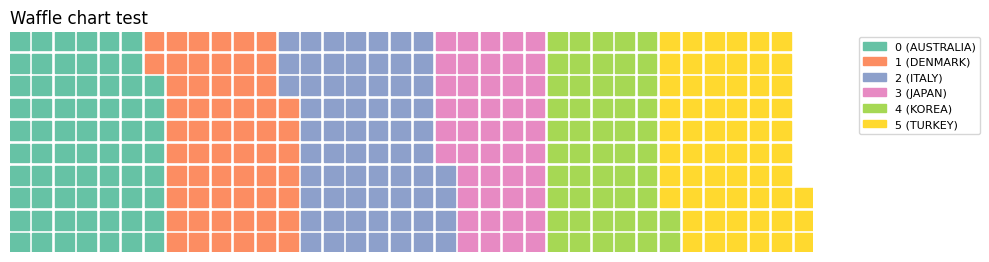

In [50]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values':df2['height_cm'],
            'labels': ['{0} ({1})'.format(n, v) for n, v in df2['country'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor':(1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10)
)

row옵션을 통해 차트 형태를 조정할 수 있다